In [111]:
import pandas as pd
import os 
import kaggle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns

In [112]:
df = pd.read_csv('../data/external/heart.csv')

In [113]:
df_visu = df.copy()

In [114]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
# Iterate over categorical columns
for col in categorical_columns:
    # Encode categorical column into numerical values
    df_visu[col] = label_encoder.fit_transform(df_visu[col])

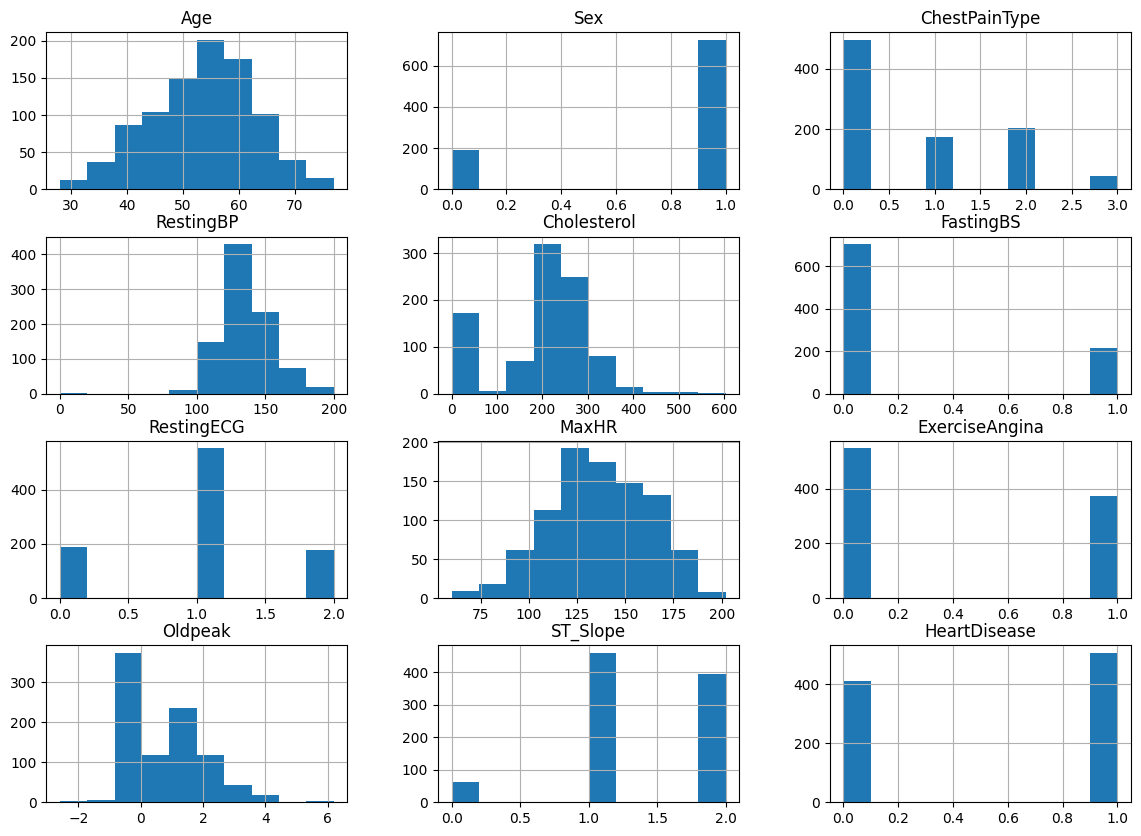

In [115]:
df_visu.hist(figsize=(14,10))
plt.show()

In [116]:
sex_counts = df['Sex'].value_counts()

female_count = sex_counts.get('F', 0)
male_count = sex_counts.get('M', 0)
total_count = female_count + male_count

if total_count > 0:
    female_ratio = female_count / total_count
    male_ratio = male_count / total_count
    print("Female ratio:", female_ratio)
    print("Male ratio:", male_ratio)
else:
    print("No data available")

Female ratio: 0.210239651416122
Male ratio: 0.789760348583878


In [117]:
corr_matrix = df_visu.corr()

In [118]:
corr_matrix['HeartDisease'].sort_values(ascending=False)

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

In [119]:
attributes = []
for ind,val in corr_matrix['HeartDisease'].items():
    if abs(val)>=0.23:
        attributes.append(ind)
print(attributes)
attributes.append('Sex')

['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [120]:
attributes.remove('HeartDisease')

Index(['Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


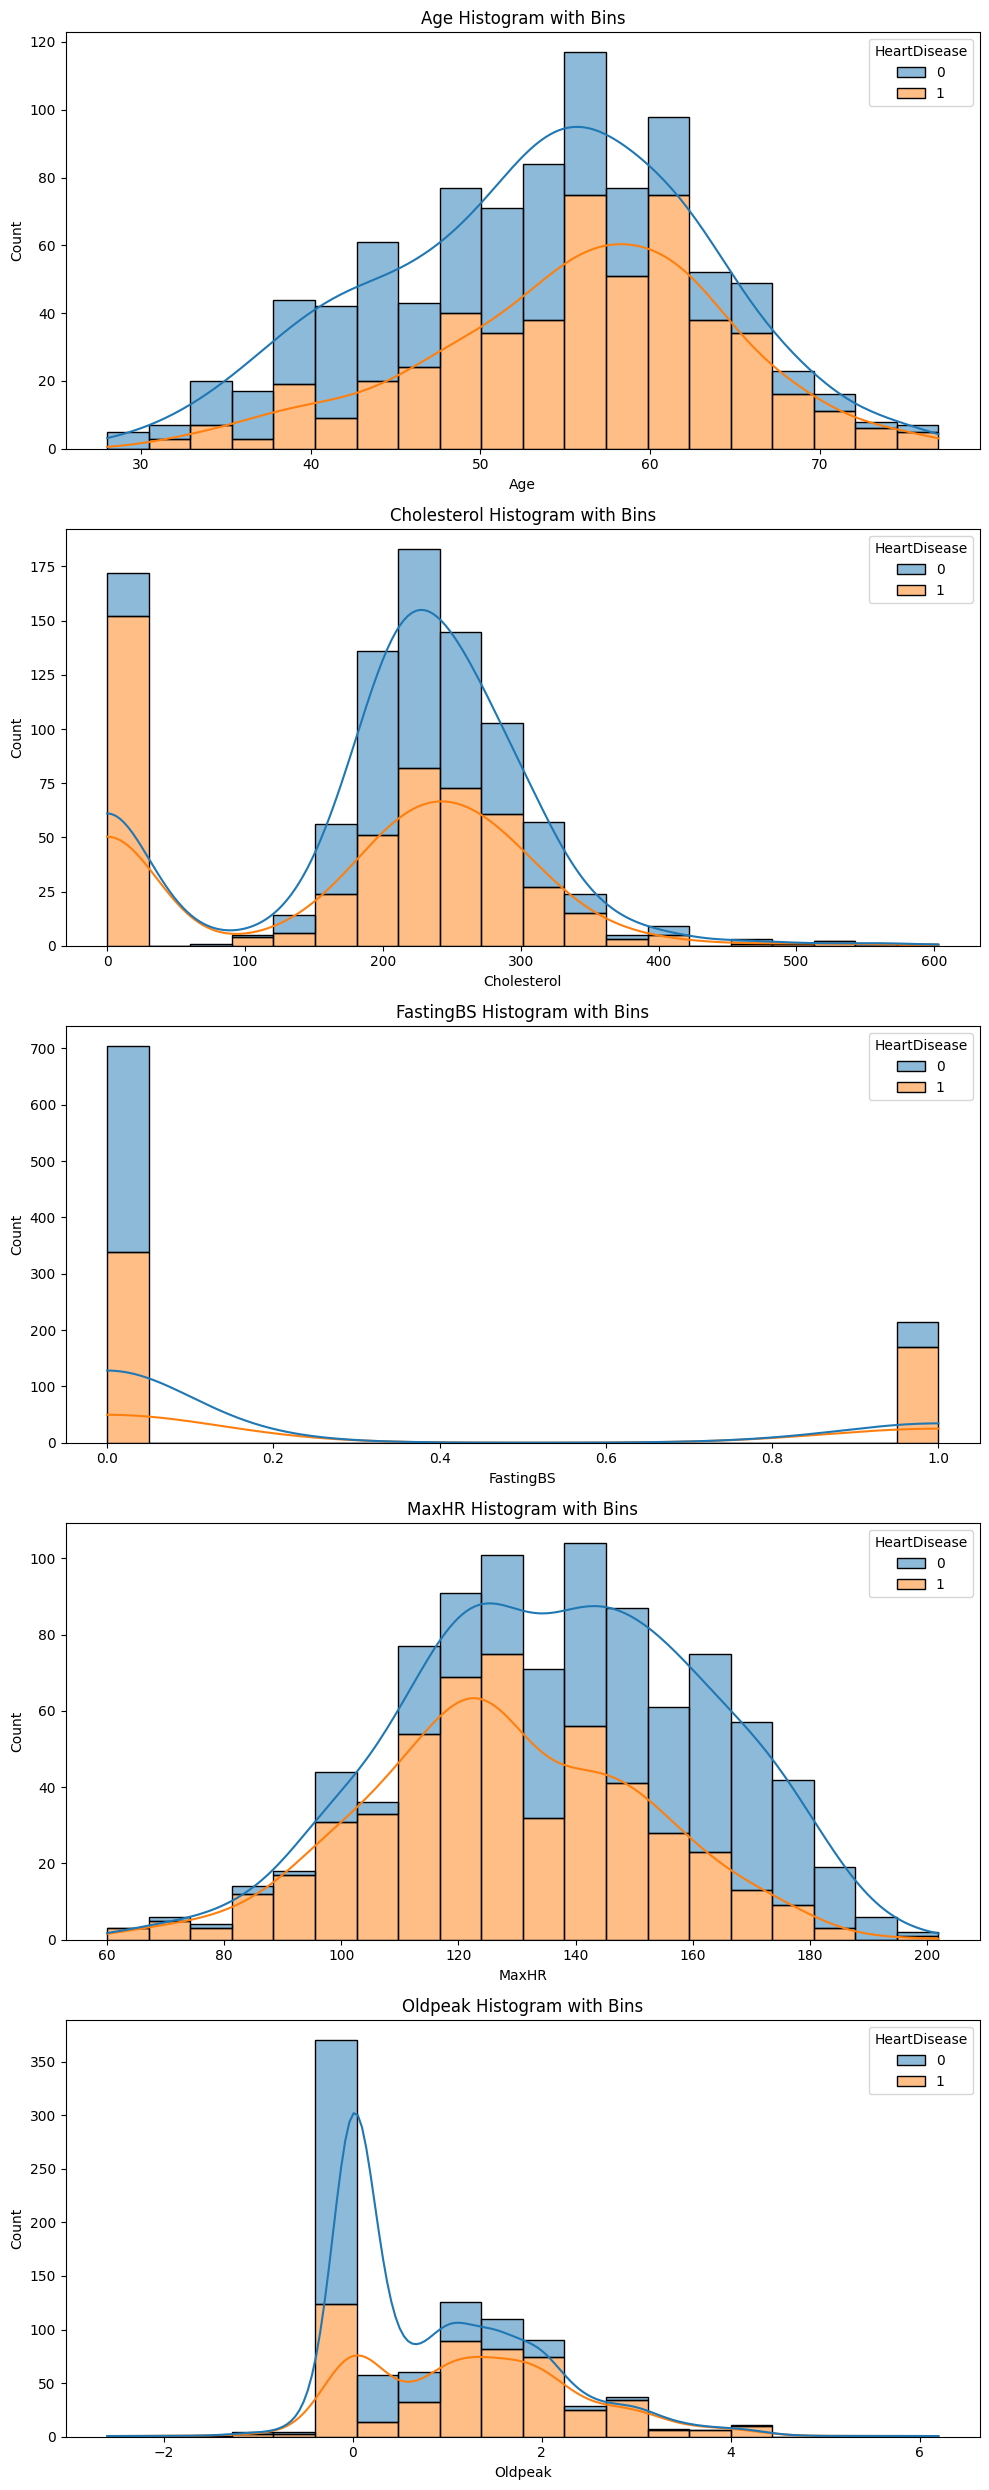

In [121]:
numerical_attributes = df[attributes].select_dtypes(include=['number']).columns
print(numerical_attributes)
# Create subplots for each numerical attribute
fig, axes = plt.subplots(nrows=len(numerical_attributes), ncols=1, figsize=(10, len(numerical_attributes)*5))

# Iterate over numerical attributes
for i, attr in enumerate(numerical_attributes):
    # Create histogram with bins
    sns.histplot(data=df, x=attr, hue='HeartDisease', multiple='stack', bins=20, ax=axes[i], kde=True)
    axes[i].set_title(f'{attr} Histogram with Bins')

# Adjust layout
plt.tight_layout()
plt.show()

Index(['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope', 'Sex'], dtype='object')


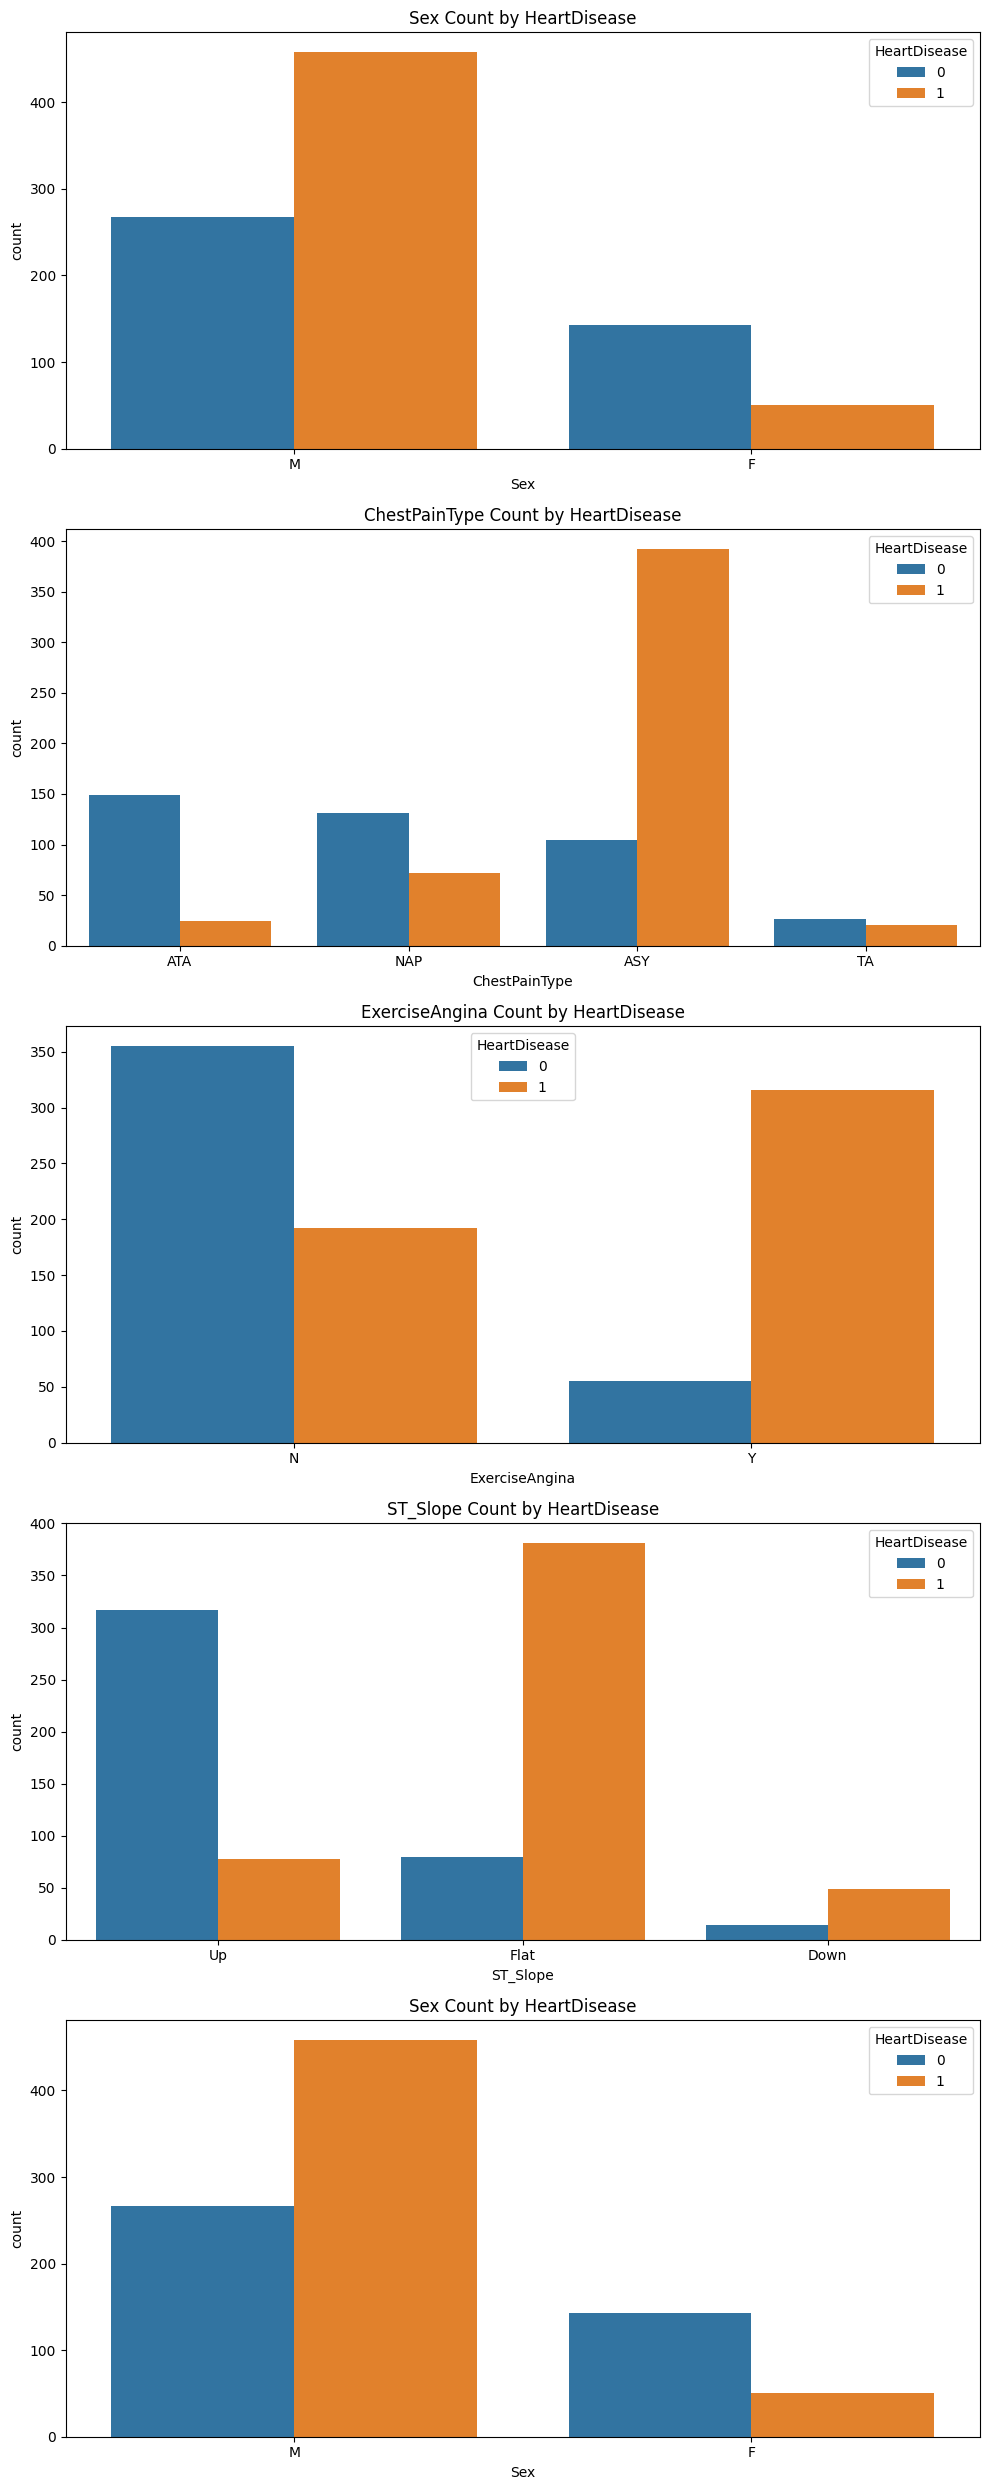

In [122]:
categorical_attributes = df[attributes].select_dtypes(include=['object', 'category']).columns
print(categorical_attributes)

# Create subplots for each categorical attribute
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, len(categorical_attributes)*5))

# Iterate over categorical attributes
for i, attr in enumerate(categorical_attributes):
    # Create bar plot
    sns.countplot(x=attr, hue='HeartDisease', data=df, ax=axes[i])
    axes[i].set_title(f'{attr} Count by HeartDisease')

# Adjust layout
plt.tight_layout()
plt.show()